## Project Face Mask Segmentation

#### Project 08

- Objective : To predict the boundaries(mask) around the face in a given image.

----

#### Dataset
- Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

#### Importing Data from Google Drive.

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


#### Change current working directory to project folder

In [3]:
!ls '/gdrive/My Drive/Greatlearning_AI-ML/study/08-Project-ComputerVision/dataset'

images.npy


In [4]:
%cd '/gdrive/My Drive/Greatlearning_AI-ML/study/08-Project-ComputerVision/dataset'

/gdrive/My Drive/Greatlearning_AI-ML/study/08-Project-ComputerVision/dataset


In [5]:
!ls

images.npy


#### Load the "images.npy" file

In [6]:
import numpy as np
data = np.load('images.npy', allow_pickle = True)

#### Check one sample from the loaded "images.npy" file

In [7]:
data[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

#### Set image dimensions

In [30]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

HEIGHT_CELLS = 28
WIDTH_CELLS = 28

CELL_WIDTH = IMAGE_WIDTH / WIDTH_CELLS
CELL_HEIGHT = IMAGE_HEIGHT / HEIGHT_CELLS

#### Create features and labels

In [31]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

#### Print the shape of X_train and mask array

In [32]:
X_train.shape

(409, 128, 128, 3)

In [33]:
masks.shape

(409, 128, 128)

#### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96862745 -0.96862745 -0.96862745]]

 [

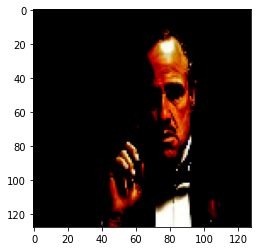

In [34]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


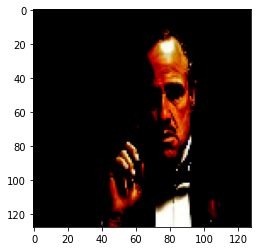

In [35]:
pyplot.imshow(X_train[n])

In [36]:
pyplot.imshow(masks[n])

#### Create the model

- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [37]:
# !pip install git+https://github.com/qubvel/segmentation_models

In [38]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

# def create_model(trainable=True):
#     model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights='imagenet')
#     for layer in model.layers:
#         layer.trainable = trainable

#     x0 = model.layers[-1].output
#     x1 = Conv2D(4, kernel_size=4, name="coords")(x0)
#     x2 = Reshape((4,))(x1)

#     return Model(inputs=model.input, outputs=x2)


# def create_model(trainable=True):
#     model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

#     for layer in model.layers:
#         layer.trainable = trainable

#     block1 = model.get_layer("conv_pw_5_relu").output
#     block2 = model.get_layer("conv_pw_11_relu").output
#     block3 = model.get_layer("conv_pw_13_relu").output

#     x = Concatenate()([UpSampling2D()(block3), block2])
#     x = Concatenate()([UpSampling2D()(x), block1])

#     x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
#     # x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)
#     # x = Reshape((4,))(x)
#     x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)
#     return Model(inputs=model.input, outputs=x)

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    block0 = model.get_layer("conv_pw_1_relu").output 
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
 #   x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

In [39]:
# from segmentation_models import Unet
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(trainable=False)
# model = Unet(backbone_name='resnet34', encoder_weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 32)   864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 32)   128         conv1[0][0]                      
___________________________

#### Define dice coefficient function

In [40]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

#### Define loss

In [41]:
import tensorflow
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

#### Compile the model (3 marks)
- Complie the model using below parameters
 - loss: use the loss function defined above
 - optimizers: use Adam optimizer
 - metrics: use dice_coefficient function defined above



In [53]:
# model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])
optimizer = tensorflow.keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, loss=loss, metrics=[dice_coefficient])

#### Define checkpoint and earlystopping

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

#### Fit the model (Pending)
- Fit the model using below parameters
 - epochs: you can decide
 - batch_size: 1
 - callbacks: checkpoint, reduce_lr, stop



In [44]:
X_train.shape

(409, 128, 128, 3)

In [55]:
model.fit(X_train, masks, epochs=2, batch_size=1, callbacks=[checkpoint, stop, reduce_lr])

Epoch 1/2

Epoch 00001: loss did not improve from 0.35893
  1/409 [..............................] - ETA: 0s - loss: 0.9344 - dice_coefficient: 0.4123
Epoch 00001: loss did not improve from 0.35893
  2/409 [..............................] - ETA: 1:20 - loss: 0.6761 - dice_coefficient: 0.5526
Epoch 00001: loss did not improve from 0.35893
  3/409 [..............................] - ETA: 1:47 - loss: 0.5680 - dice_coefficient: 0.6466
Epoch 00001: loss did not improve from 0.35893
  4/409 [..............................] - ETA: 1:55 - loss: 0.5401 - dice_coefficient: 0.6528
Epoch 00001: loss did not improve from 0.35893
  5/409 [..............................] - ETA: 2:02 - loss: 0.5889 - dice_coefficient: 0.6320
Epoch 00001: loss did not improve from 0.35893
  6/409 [..............................] - ETA: 2:06 - loss: 0.5548 - dice_coefficient: 0.6608
Epoch 00001: loss did not improve from 0.35893
  7/409 [..............................] - ETA: 2:09 - loss: 0.5476 - dice_coefficient: 0.67

#### Get the predicted mask for a sample image (Pending)

In [69]:
n = 13
sample_image = X_train[n]

In [74]:
from keras.applications.mobilenet import preprocess_input
from numpy import asarray
from PIL import Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AttributeError: ignored

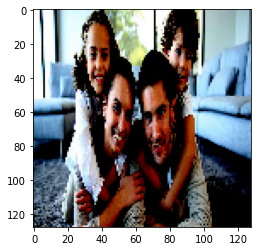

In [71]:
import matplotlib.pyplot as plt

unscaled = pyplot.imshow(sample_image)
image = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)

feat_scaled = preprocess_input(np.array(image, dtype=np.uint8))

region = model.predict(x=np.array([feat_scaled]))[0]

output = np.zeros(unscaled.shape[:2], dtype=np.uint8)
for i in range(region.shape[1]):
    for j in range(region.shape[0]):
        if region[i][j] > THRESHOLD:
            x = int(CELL_WIDTH * j * unscaled.shape[1] / IMAGE_WIDTH)
            y = int(CELL_HEIGHT * i * unscaled.shape[0] / IMAGE_HEIGHT)
            x2 = int(CELL_WIDTH * (j + 1) * unscaled.shape[1] / IMAGE_WIDTH)
            y2 = int(CELL_HEIGHT * (i + 1) * unscaled.shape[0] / IMAGE_HEIGHT)
#             cv2.rectangle(unscaled, (x, y), (x2, y2), (0, 255, 0), 1)

            output[y:y2,x:x2] = 1

_, contours, _ = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(unscaled, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(unscaled)

#### Impose the mask on the image (Pending)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: ignored

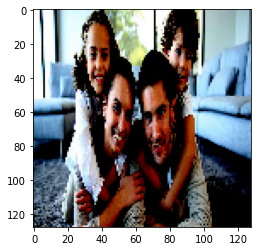

In [72]:
unscaled = pyplot.imshow(sample_image)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)

### RnD